# Assignment:Gramener Case Study

# Contents
    1. Pre-Data Analysis
        1.1. Understanding the Dataset
            1.1.1. Description
            1.1.2. Objective
            1.1.3. Workflow
            1.1.4. Key Assumptions
    2. Reading, Cleaning and Inspecting
        2.1. Null Values
        2.2. Drop Unnecessary Columns
        2.3. Some Important Distributions
    3. Variable Analysis
        3.1. Interest Rate
            3.1 Interest Rate: Results
        3.2. Term of the Loan
            3.2.1. Term of the Loan and Installment
        3.3. Debt-to-Income Ratio
        3.4. Purpose
        3.5. Home Ownership
            3.5.1. Home Ownership and Loan Status   
        3.6. Number of Publicly Recorded Bankruptcies
        3.7. Delinquency of Accounts
            3.7.1. Terms Ratio
            3.7.2. Terms Ratio and DTI
    4. Conclusions

# Understanding the dataset

## Description
The data given contains the information about past loan applicants and whether they ‘defaulted’ or not This dataset consists of 111 attributes/columns This dataset consists of 39717 rows.

The company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.

## Objective
The objective of this analysis is to identify the driving factors behind loan defaults, there by reducing credit losses which is the biggest loss maker for the organization.

According to the data dictionary, the customers labelled as 'charged-off' are the 'defaulters'.

## Workflow
The workflow for this analysis is rather simple. The focus is on exploratory analysis of variables. Following this flow, the code in this .ipynb is organized according to the different variables analyzed. There will be a clear heading indicating the starting and ending of each variable.

## Key Assumptions
One key assumption made throughout the entire analysis is that people who are currently paying the loan will not default in the future.

In [1]:
# importing dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

sns.set(style="ticks", color_codes=True)

In [2]:
# The warnings filter controls whether warnings should be ignored, displayed, or turned into errors 
#(raising an exception)
import warnings
warnings.filterwarnings('ignore')

# Reading, Inspection & Cleaning

Import and read the database. Store it in a variable called loan.

In [3]:
loan = pd.read_csv(r"Data/loan.csv", encoding = "ISO-8859-1")

## Null values

Data sets, most of the times end up with lot of invalid, corrupt, or missing values.
This later creates problems while operating that data frame.

While making a Data Frame from a csv file, many blank columns are imported as null value into the Data Frame. 
Inspecting these null values and handling them at the start is a good way to make the analysis easier and readable.

In [4]:
loan.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
5        58
6        57
7        57
8        58
9        57
10       57
11       58
12       57
13       57
14       58
15       58
16       57
17       57
18       56
19       58
20       57
21       57
22       57
23       58
24       58
25       58
26       58
27       56
28       57
29       57
         ..
39687    59
39688    61
39689    59
39690    59
39691    59
39692    60
39693    59
39694    59
39695    59
39696    59
39697    59
39698    59
39699    59
39700    60
39701    59
39702    59
39703    59
39704    60
39705    59
39706    60
39707    59
39708    59
39709    60
39710    60
39711    59
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

In [5]:
# percentage missing values in every column
round(100*(loan.isnull().mean()),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

## Drop unecessary columns

Large volumes of data bring with them large data problems. These might be in the form of missing values, inconsistent formatting, malrformed recordes or nonsensical outliers.

Data analysis is about finding the subset of data that best explain a given phenomenon. Therefore, cleaning a dataset and getting it down to a workable size is an important step in the analysis.

In the given dataset, not all variables are useful for the objective of this analysis as many of them contain no information, i.e., are  completely empty. These can be dropped right away. 

Also, columns containing more than 15% null values are fit for dropping too. While they might contain information, the considerably large number of missing values make these columns hard to deal with. Instead of focusing energy on treating these missing values, dropping them and focusing on the remainder would be a better choice. 

The number 15% was not decided randomly. Generally, textbooks on the subject and experts in the field recommend a threshhold of 6-10%. If there are more than 6-10% of missing values in a column, then the it's usually not worth the effort of treating it. This is unless the column contains a lot of information and very important to the analysis. 

The decision made here was completely data driven.

In [6]:
# Distilling the data down & retaining the coulmns that will help in meaningful analysis 
loan.drop(loan.columns[loan.isnull().mean() > 0.15], axis = 1, inplace = True)

In [7]:
# dropping memeber id, a redundant id
loan.drop(["member_id"], axis = 1, inplace = True)

In [8]:
loan.shape

(39717, 52)

## Some Important Distributions

This is done to plan on handling the given categorical data.

We decided to create the subsets of the data remained after cleansing and work on these subsets.


A large amount of the columns present in the dataset are categorical in nature. A good start would be to look at the distributions of these categories. Such a procedure combined with domain knowledge from research would help in filtering out the most important columns.

In [9]:
# distribution of term
loan.groupby('term').size()/len(loan.index)*100

term
 36 months    73.258302
 60 months    26.741698
dtype: float64

In [10]:
# distribution of home_ownership
loan.groupby('home_ownership').size()/len(loan.index)*100

home_ownership
MORTGAGE    44.462069
NONE         0.007553
OTHER        0.246746
OWN          7.699474
RENT        47.584158
dtype: float64

In [11]:
# distribution of loan_status
loan.groupby('loan_status').size()/len(loan.index)*100

loan_status
Charged Off    14.167737
Current         2.870307
Fully Paid     82.961956
dtype: float64

In [12]:
# distribution of grade of the loan
loan.groupby('grade').size()/len(loan.index)*100

grade
A    25.392149
B    30.264119
C    20.389254
D    13.362036
E     7.155626
F     2.641186
G     0.795629
dtype: float64

In [13]:
# distribution of verification status of the source
loan.groupby('verification_status').size()/len(loan.index)*100

verification_status
Not Verified       42.603923
Source Verified    25.145404
Verified           32.250674
dtype: float64

In [14]:
# distribution of the purpose of the loan
loan.groupby('purpose').size()/len(loan.index)*100

purpose
car                    3.900093
credit_card           12.916383
debt_consolidation    46.934562
educational            0.818289
home_improvement       7.493013
house                  0.959287
major_purchase         5.506458
medical                1.744845
moving                 1.467885
other                 10.053629
renewable_energy       0.259335
small_business         4.602563
vacation               0.959287
wedding                2.384369
dtype: float64

In [15]:
# distribution of states
(loan.groupby('addr_state').size()/len(loan.index)*100).sort_values(ascending = False)

addr_state
CA    17.873958
NY     9.597905
FL     7.216054
TX     6.866077
NJ     4.657955
IL     3.839666
PA     3.819523
VA     3.542564
GA     3.519903
MA     3.373870
OH     3.079286
MD     2.641186
AZ     2.213158
WA     2.114963
CO     1.994108
NC     1.984037
CT     1.890878
MI     1.812826
MO     1.727220
MN     1.548455
NV     1.251353
SC     1.188408
WI     1.158194
AL     1.138052
OR     1.135534
LA     1.097767
KY     0.818289
OK     0.752826
KS     0.682327
UT     0.649596
AR     0.616864
DC     0.538812
RI     0.498527
NM     0.475867
WV     0.445653
HI     0.438100
NH     0.430546
DE     0.287031
MT     0.214014
WY     0.208979
AK     0.201425
SD     0.161140
VT     0.135962
MS     0.047838
TN     0.042803
IN     0.022660
ID     0.015107
IA     0.012589
NE     0.012589
ME     0.007553
dtype: float64

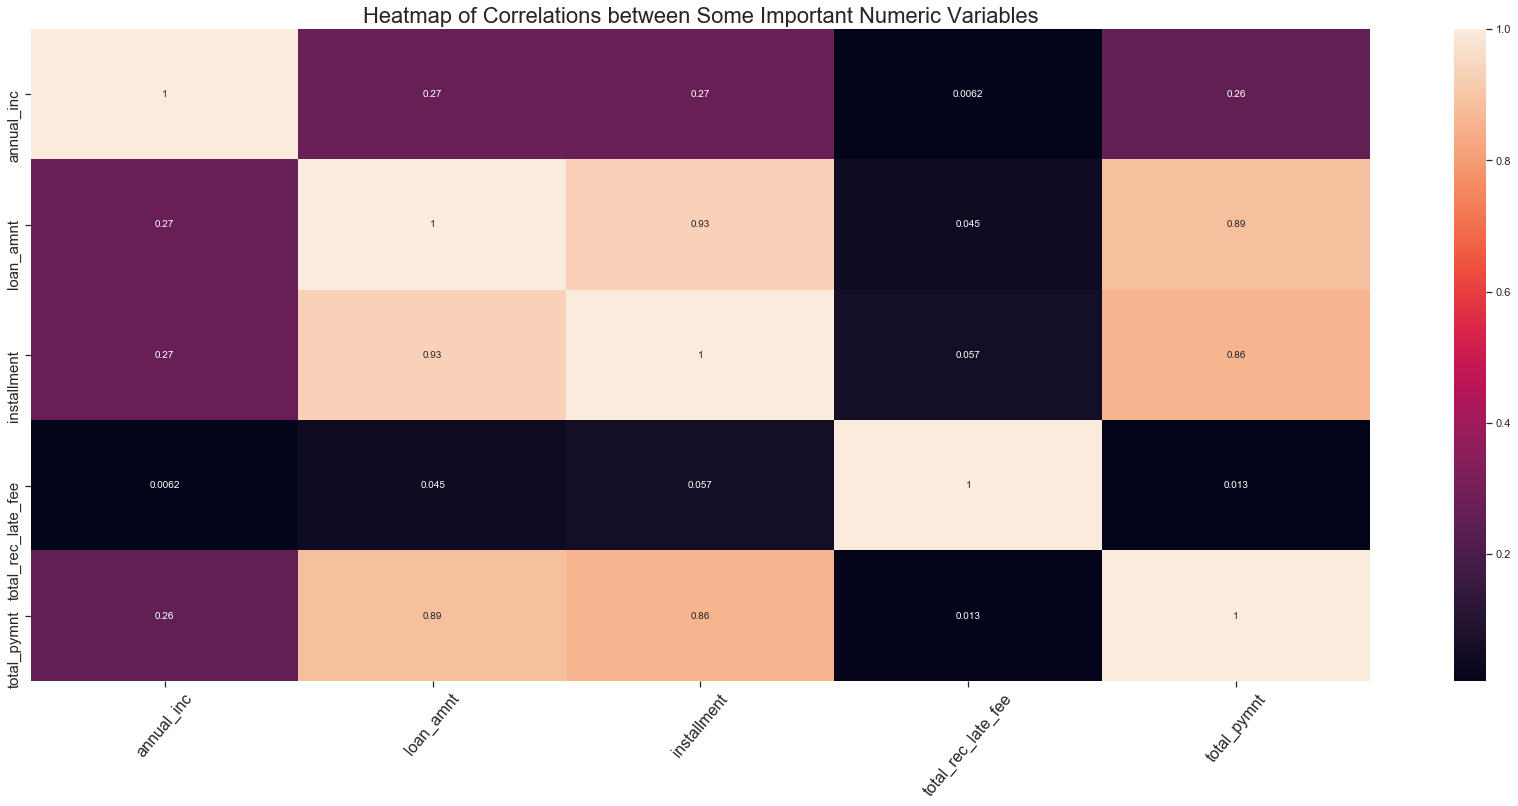

In [16]:
# checking out a few correlations
plt.figure(figsize = (30,12))
sns.heatmap(loan[['annual_inc','loan_amnt', 'installment','int_rate', 'total_rec_late_fee','total_pymnt']].corr(),annot=True)
plt.xticks(rotation = 50, fontsize = 16)
plt.yticks(rotation = 90, fontsize = 15)
plt.title("Heatmap of Correlations between Some Important Numeric Variables", fontsize = 22)
plt.show()

### Crosschecking the Excel sheet after data cleaning
This is a checkpoint in the analysis to make sure that the changes made so far have had the desired effects.

In [17]:
# writing the transformed data to disk
loan.to_csv(r"Data/loan_Check1.csv",sep = '\t', encoding = 'utf-8')

In [18]:
# subsetting the columns required for analysis
analysis_columns = ["loan_status","purpose", "loan_amnt", "total_rec_prncp", "home_ownership", "term",
                "installment", "dti", "recoveries", "int_rate", "addr_state", "id"]
loans_final = loan.loc[:, analysis_columns].copy()

Each of the sections below will be reserved for the analysis of one particular variable. The section titles will indicate which variable is being analyzed.

# Variable Analysis

## Interest Rate

The general conclusion is that higher a loan's interest rate, greater the number of defaulters. Is this true for the current dataset? Are there statistically significant differences among the interest rates of loans on which the borrowers did and did not default?

Answering these questions is going to be the aim of this section.

First off, there's a problem with working on the interest rates as they are. The numerical value of the interest rates is followed by the "%" symbol. It's better to remove that, convert interest rate to a numeric var and analyze it.

In [19]:
# converting loans_final.int_rate to float32
loans_final["int_rate"] = loans_final["int_rate"].str.replace("%", "")
loans_final["int_rate"] = loans_final["int_rate"].astype("float32")

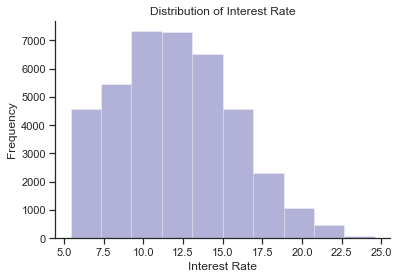

In [20]:
# distribution of interest rate
plt.hist(loans_final["int_rate"], alpha = 0.3, color = "navy")
plt.title("Distribution of Interest Rate")
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
sns.despine()
plt.show()

The distribution of interest rate for the loans that were charged off seem to follow a normal distribution. It'd be a good action to test that observation as it would help a lot during the modeling / hypothesis testing stage.

In [21]:
### function to get cdf of the variable
def evalCdf(arr, x):
#     count = 0
#     for t in ts:
#         if x > t:
#             count += 1
#     return count /  len(ts)
    arr = arr.reshape(1, arr.size)
    sorted_arr = np.sort(arr)
    prob = (x > sorted_arr).sum() / sorted_arr.size
    return prob

In [22]:
# the data cdf
data = loans_final["int_rate"]
data_cdf = data.apply(lambda x: evalCdf(np.array(data), x = x))

# set seed for reproducibility
np.random.seed(1234)

# analytic cdf
model = np.random.normal(loc = data.mean(), scale = data.std(), size = data.shape[0])
model_cdf = [evalCdf(arr = model, x = i) for i in model]

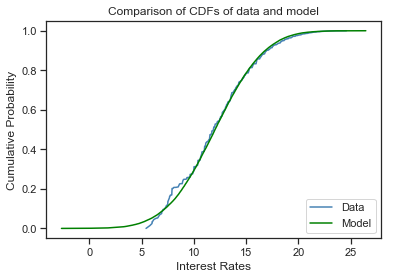

In [23]:
# a plot comparing the cdfs of the data and the model
plt.plot(sorted(data), sorted(data_cdf), color = 'steelblue', label = "Data")
plt.plot(sorted(model), sorted(model_cdf), color = "green", label = "Model")
plt.legend(loc = "lower right")
plt.title("Comparison of CDFs of data and model")
plt.xlabel("Interest Rates")
plt.ylabel("Cumulative Probability")
plt.show()

This is approximately normal. The plot shows that the normal distribution approximates the data well to a certain extent. But, the lower tail of the data deviate from the analytic distribution significantly. However, this data would still provide agreeable and approximately correct results when subjected to tests that expect the input data to follow a normal distribution.

What about the distributions of interest rate segmented by loan status?

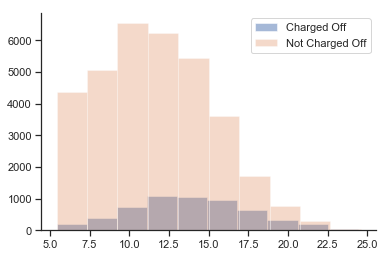

In [24]:
# distributions of interest rates for loans that have been charged off and not charged off
plt.hist(loans_final["int_rate"][loans_final.loan_status == "Charged Off"], label = "Charged Off", alpha = 0.5)
plt.hist(loans_final["int_rate"][loans_final.loan_status != "Charged Off"], label = "Not Charged Off", alpha = 0.3)
plt.legend()
sns.despine()
plt.show()

This graph shows that the data follow the normal distribution to a good extent. Though the deviation seems to be greater near the lower tails. But, this can be ignored to a certain extent and some hypothesis tests which expect the data to be normally distributed can be safely carried out on the interest rates.

Another hypothesis that can be tested is whether loans that defaulted have higher interest rates than loans that didn't. A T-test can be safely carried out. But, a more interesting option is a permutation test.

Since the permutation test does not make any assumptions about how the data are distributed, it can used safely (to a certain extent).

The hypothesis to test here would be:

$$H_o: \mu_{Charged Off} = \mu_{Not Charged Off}$$
That is,

$$H_o: \mu_{Charged Off} - \mu_{Not Charged Off} = 0$$
The research hypothesis would be:

$$H_a: \mu_{Charged Off} \neq \mu_{Not Charged Off}$$
That is,

$$H_a: \mu_{Charged Off} - \mu_{Not Charged Off} \neq 0$$
Testing this hypothesis at a 5% significance level would give us a good idea of the difference in the data.

In [25]:
# function to find out mean difference
def meanDiff(x, n1, n2):
    n = n1 + n2
    total = np.arange(n)
    indices1 = np.random.choice(n, n1, replace = False)
    indices2 = total[~np.isin(total, indices1)]
    
    mean_diff = x[indices1].mean() - x[indices2].mean()
    return mean_diff

# a function to carry out a permutation test
def permutationTest(x, n1, n2, times= 1000):
    differences = []
    print("Carrying out the permutation test {0} times...".format(times))
    for i in list(range(times)):
        difference = meanDiff(x, n1, n2)
        differences.append(difference)
    
    return differences

In [26]:
# setting random seed for reproducibility
np.random.seed(1234)
# carrying out a permutation test on the interest rates
interest_test_results = permutationTest(x = loans_final["int_rate"], n1 = 5627, n2 = 34090, times = 1000)

Carrying out the permutation test 1000 times...


In [27]:
# finding the actual difference in means
actual_difference = loans_final["int_rate"][loans_final.loan_status == "Charged Off"].mean() - \
loans_final["int_rate"][loans_final.loan_status != "Charged Off"].mean()

Now that both the actual difference and the difference of the permutation test carried out 1000 times, the p-value associated with the test can be calculated.

In [28]:
# p-value associated with the test
sum([i > 0 for i in interest_test_results]) / 1000

0.509

A plot of the distributions of the difference between sample means paints a better picture.

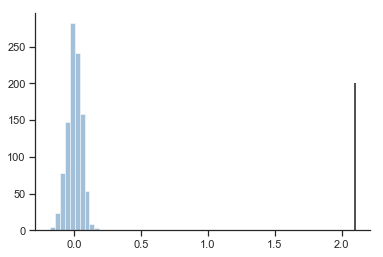

In [29]:
plt.hist(interest_test_results, alpha = 0.5, color = "steelblue")
plt.vlines(x = actual_difference, ymin = 0, ymax = 200)
sns.despine()
plt.show()

The actual difference lies well outside the calculated differences. Thus, we have enough evidence to reject the null hypothesis that the difference between the means is equal to zero.

Text(0, 0.5, 'Interest Rate')

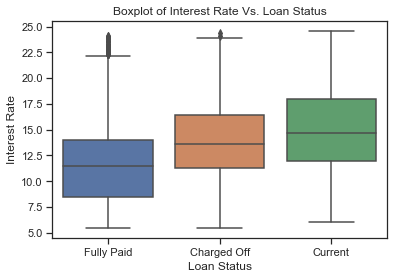

In [30]:
# boxpot of interest rate across loan_status
sns.boxplot(x = loans_final["loan_status"],y = loans_final["int_rate"])
plt.title("Boxplot of Interest Rate Vs. Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")

### Interest Rate: Results

Here are the results of the analysis of interest rate segmented over loan status.

1. The distribution of the status of the loan is approximately normal. Thus, hypothesis tests that expect the data to be normally distributed would provide good results.
2. The difference between the means of interest rates of the loans that did and didn't default is statistically significant. This means that the loans that have defaulted on average have interest rates that are different from loans that didn't default. This information can drive a lot of decisions and could lead to the development of better models.

## Terms of the Loan and Debt-to-income ratio

The next columns of interest would be debt-to-income ratio and term of the loan. The debt-to-income ratio is used by a lot of banks to determine if an applicant has the capaicity to repay a loan. Logically, this would make it a column worth analyzing.

The term of the loan, directly does not provide us with much information. However, it still does give us information which can be used in some other way.

## Term of the loan

Text(0, 0.5, 'Count')

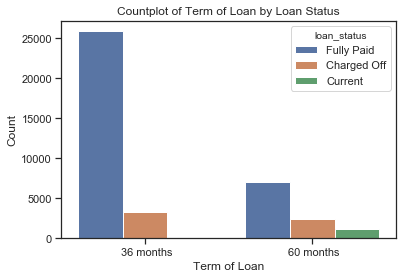

In [31]:
# countplot of terms of loan by loan status
sns.countplot(loans_final["term"],hue = loans_final["loan_status"])
plt.title("Countplot of Term of Loan by Loan Status")
plt.xlabel("Term of Loan")
plt.ylabel("Count")

The plot above paints a clear picture. Loans with terms of 36 months have a greater number of defaults than loans with terms of 60 months.

This merits further analysis. Maybe looking at the installements will present more information. 

To make understanding the relationship easier, installement has been bracketed and converted to a categorical variable.

### Term of the loan and Installments
The following is a look at how installment and term of the loan are related to each other.

In [32]:
# function to get the bracket
def Installament_bracket(x):
    'Dividing Intrest rate into following categories'
    if x < 100:
        return "Install_1"
    elif 100 <= x < 200:
        return "Install_2"    
    elif 200 <= x < 300:
        return "Install_3"    
    elif 300 <= x < 400:
        return "Install_4"
    elif 400 <= x < 500:
        return "Install_5"
    elif 500 <= x < 600:
        return "Install_6"    
    elif 600 <= x < 700:
        return "Install_7"    
    elif 700 <= x < 800:
        return "Install_8"
    elif 800 <= x < 900:
        return "Install_9"
    else:
        return "Install_10"

# getting the installment brackets
loans_final['Installament_bracket'] = loan.installment.apply(lambda x: Installament_bracket(x))

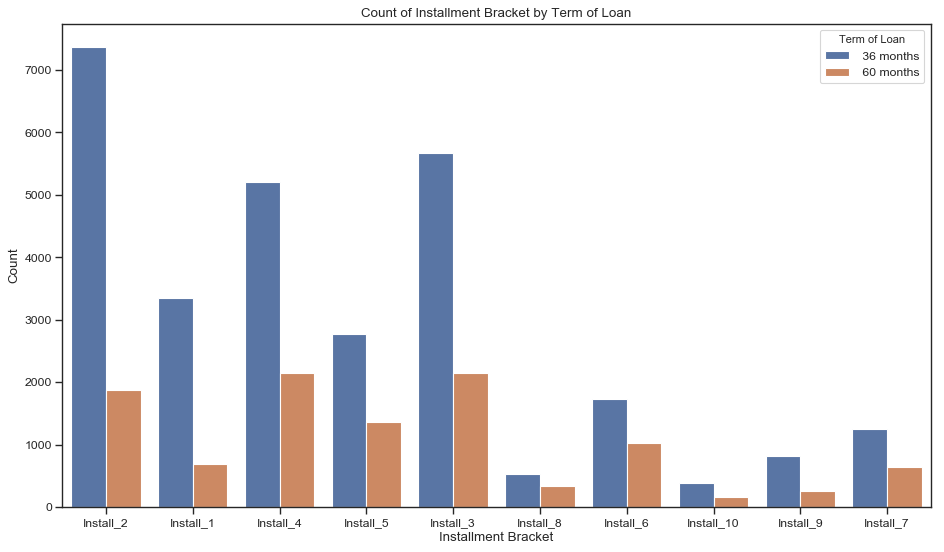

In [33]:
# countplot of installment bracket by terms
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "Installament_bracket", hue = "term", data = loans_final)
plt.title("Count of Installment Bracket by Term of Loan")
plt.xlabel("Installment Bracket")
plt.ylabel("Count")
plt.legend(title = "Term of Loan")
plt.show()

The plot above shows that most loans have a term of 36 months and that most installments are in the range 200 to 300 USD.

<Figure size 1120x640 with 0 Axes>

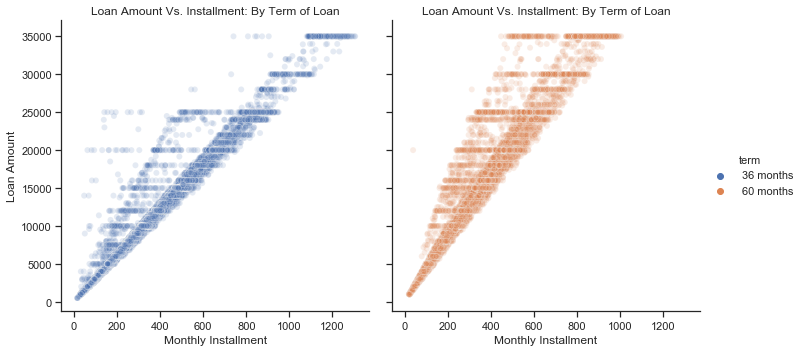

In [34]:
# plot of loan amount and installment by term of loan
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
g = sns.relplot(x = "installment", y = "loan_amnt", col = "term", hue = "term", data = loans_final, 
                kind = "scatter", alpha = 0.15)
g.set_titles("Loan Amount Vs. Installment: By Term of Loan")
g.set_xlabels("Monthly Installment")
g.set_ylabels("Loan Amount")
plt.show()

The plots above show that for loans lasting 36 monhts, the interest rates increase at a slower rate than for the loans lasting 60 months.

## Debt-to-income ratio

The dti of is the ratio of the amount of debt a person has to payout in a specified time period to the income they have in the same time period. Usually, the time period is a month.

dti is an indicator of how able the individual is to repay a loan. Higher values of dti indicate that the person has more debt for his income level. It can be thought of as a standardized measure of the amount of debt a person has.

A good way to start an exploratory analysis of this variable would be look at it's distribution

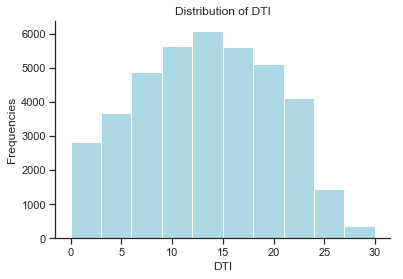

In [35]:
# distribution of dti
plt.hist(loans_final["dti"], color = "lightblue")
plt.title("Distribution of DTI")
plt.xlabel("DTI")
plt.ylabel("Frequencies")
sns.despine()
plt.show()

This seems to have a shape similar to interest rate. So, this might produce a graph that is similar to the one produced by interest rate. So, it's better to move onto the finer details of the segmented analysis.

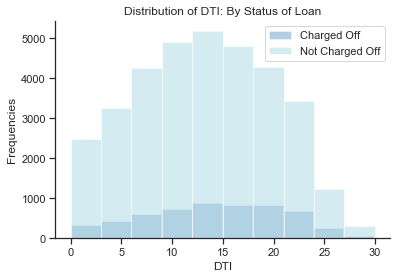

In [36]:
# plot of distributions of dit by loan status
plt.hist(loans_final["dti"][loans_final.loan_status == "Charged Off"], color = "steelblue", 
         label = "Charged Off", alpha = 0.4)
plt.hist(loans_final["dti"][loans_final.loan_status != "Charged Off"], color = "lightblue", 
         label = "Not Charged Off", alpha = 0.5)
plt.title("Distribution of DTI: By Status of Loan")
plt.xlabel("DTI")
plt.ylabel("Frequencies")
plt.legend(loc = "upper right")
sns.despine()
plt.show()

Again, the same question could be asked of dti too? Are the differences statistically significant? A permutation test can be carried. Since a way to do it has already be defined, it's better to check it out...

In [37]:
# setting random seed for reproducibility
np.random.seed(1234)

# permutation test for dti
dti_test_results = permutationTest(x = loans_final["dti"], n1 = 5627, n2 = 34090)

Carrying out the permutation test 1000 times...


In [38]:
actual_diff_dti = loans_final["dti"][loans_final.loan_status == "Charged Off"].mean() - loans_final["dti"][loans_final.loan_status != "Charged Off"].mean()

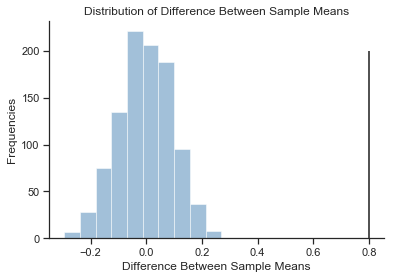

In [39]:
plt.hist(dti_test_results, alpha = 0.5, color = "steelblue")
plt.title("Distribution of Difference Between Sample Means")
plt.xlabel("Difference Between Sample Means")
plt.ylabel("Frequencies")
sns.despine()
plt.vlines(actual_diff_dti, ymin = 0, ymax = 200)

The actual difference lies well outside the calculated difference assuming that the null hypothesis is true. Thus, it's reasonable to conclude that a difference in means of dti does exist for loans that did default and that didn't default.

# Purpose of Loan
This is a variable that contains information about the purpose of the loan. Analysis of this might prove to be useful.

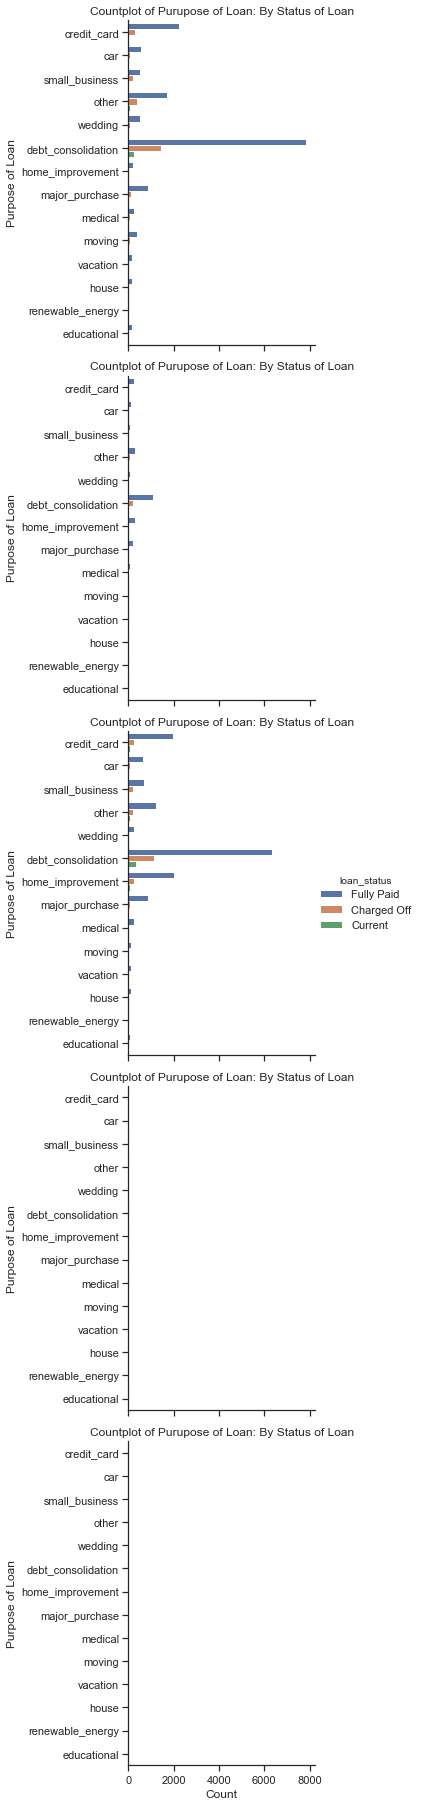

In [40]:
g = sns.catplot(y = "purpose", hue = "loan_status", row = "home_ownership", data = loans_final, kind="count")
g.set_titles("Countplot of Purupose of Loan: By Status of Loan")
g.set_xlabels("Count")
g.set_ylabels("Purpose of Loan")
plt.show()

In [41]:
# bucketing the loans for further analysis
def loan_bucket(val):
    if val <= 5000:
        return 'LOW'
    elif val <= 10000:
        return 'MODERATE'
    elif val <= 15000:
        return 'MODERATE HIGH'
    elif val <= 20000:
        return 'HIGH'
    else:
        return 'EXTREME HIGH'
    
loans_final['loan_value'] = loan["loan_amnt"].apply(lambda x: loan_bucket(x))

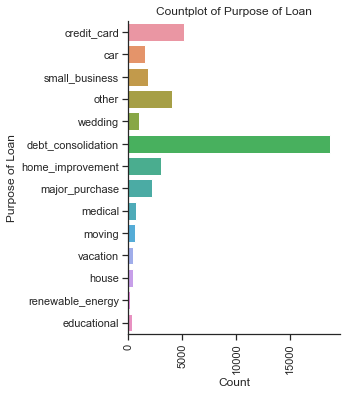

In [42]:
# countplot of purpose of loan
sns.catplot(y = "purpose", data = loans_final, kind = "count")
plt.title("Countplot of Purpose of Loan")
plt.ylabel("Purpose of Loan")
plt.xticks(rotation = 90)
plt.xlabel("Count")
plt.show()

From the plot shown above, it's clear that debt consolidation has the highest count. So, it might be good to take a closer look at those loans that were borrowed for debt consolidation.

In [43]:
# creating two new variables storing information about percentage payment recovered
loans_final['percent_pymnt_rec'] = (loan.total_pymnt/loan.loan_amnt)*100
loans_final['percent_pymnt_not_rec'] = (1-(loan.total_pymnt/loan.loan_amnt))*100

# function to bucket percentage payments
def PercentageBucketing(val):
    if (val < 10):
        return '0-9'
    elif (val >= 10 and val < 20):
        return '10-19'
    elif (val >= 20 and val < 30):
        return '20-29'
    elif (val >= 30 and val < 40):
        return'30-39'
    elif (val >= 40 and val < 50):
        return '40-49'
    elif (val >= 50 and val < 60):
        return '50-59'
    elif (val >= 60 and val < 70):
        return '60-69'
    elif (val >= 70 and val < 80):
        return '70-79'
    elif (val >= 80 and val < 90):
        return '80-89'
    elif (val >= 90 and val < 100):
        return '90-99'
    elif (val >= 100 ):
        return '100'    


# bucking percentage payment recieved and not recieved
loans_final['percent_pymnt_rec_range']=loans_final.percent_pymnt_not_rec.apply(lambda x: PercentageBucketing(x))
loans_final['percent_pymnt_not_rec_range']=loans_final.percent_pymnt_not_rec.apply(lambda x: PercentageBucketing(x))

In [44]:
# creating a new dataframe for loans that were borrowed for debt consolidation and were charged off
debt_consolidation = loans_final.loc[(loans_final['loan_status'] == 'Charged Off') & (loans_final['purpose'] == 'debt_consolidation')
                               , :].copy()

In [45]:
# statistics for loan amount by loan value
debt_consolidation.groupby('loan_value')['loan_amnt'].agg(['count','sum','mean','median'])

,count,sum,mean,median
loan_value,,,,
EXTREME HIGH,500,13377775,26755.550000,25000
HIGH,465,8378075,18017.365591,18000
LOW,432,1568000,3629.629630,4000
MODERATE,771,6207025,8050.616083,8000
MODERATE HIGH,599,7873225,13143.948247,13000


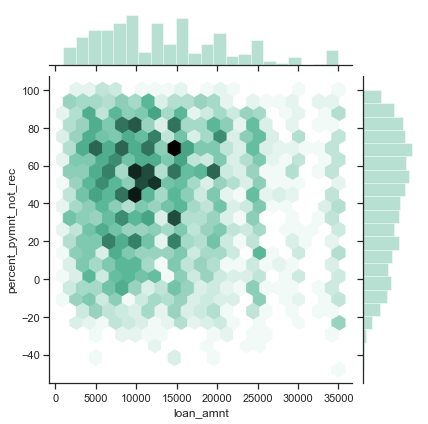

In [46]:
sns.jointplot(x = "loan_amnt", y = "percent_pymnt_not_rec", data = debt_consolidation, 
              kind = "hex", color = "#4CB391")

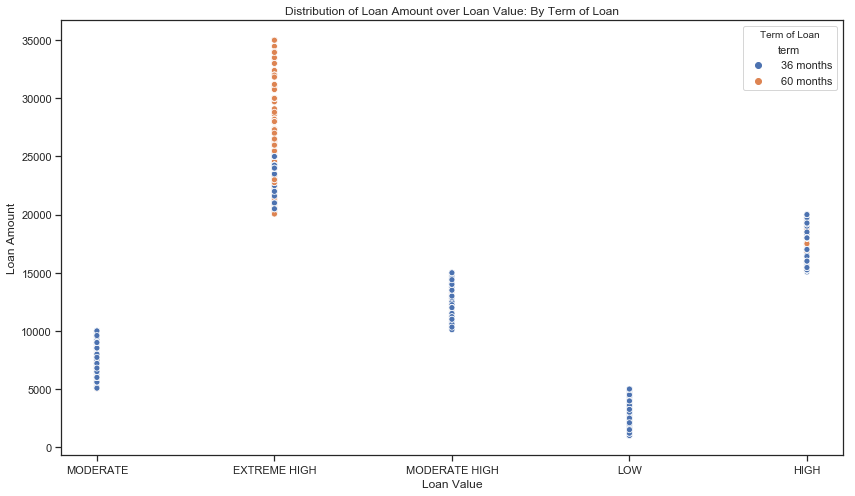

In [47]:
# scatter plot of loan value and loan amount for loans borrowed for debt consolidation purposes
plt.figure(num = None, figsize = (14, 8))
sns.scatterplot(x = "loan_value", y = "loan_amnt", data = debt_consolidation, hue = "term")
plt.title("Distribution of Loan Amount over Loan Value: By Term of Loan")
plt.xlabel("Loan Value")
plt.ylabel("Loan Amount")
plt.legend(title = "Term of Loan")
plt.show()

## Home Ownership
In general, in the banking sector there is a strong correlation between the home ownership and the grading of the loan given to the customer by the bank. The home ownership status is a strong indictor of the ability of the customer to repay the amount owed to the bank.

### Loan Status and Home Ownership
Here, the idea is to check how home onwership and loan status are related to one another.

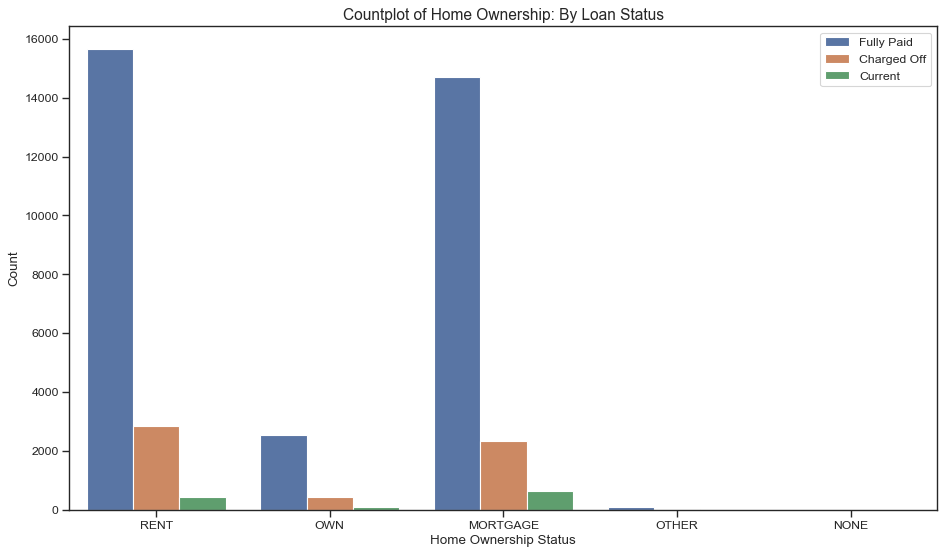

In [48]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "home_ownership", hue = "loan_status", data = loans_final)
plt.title("Countplot of Home Ownership: By Loan Status", fontsize = 14)
plt.xlabel("Home Ownership Status")
plt.ylabel("Count")
plt.legend(loc = "upper right")
plt.show()

From the plot it is clear that most loans of customers staying in a rented house are charged off. This is followed by customers having a on their mortgage property.

## Number of Public Bankruptcies

This is another variable of interest. Common sense tells us that there is a relationship between defaulting and the number of bankruptcies. But, is this true for the given data? Time to find out...

In [49]:
# adding bankruptcies to the mix
loans_final["bankruptcies"] = loan["pub_rec_bankruptcies"]

In [50]:
# description of bankruptcies
loans_final["bankruptcies"].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: bankruptcies, dtype: float64

In [51]:
# info about bankruptcies
loans_final["bankruptcies"].isnull().mean()

0.017549160309187503

Bankruptcies contains about 1.75% missing values. This is not much. Relative to the size of the data, we can impute them with the mode, (since this particular variable has only a few recurring values) or just drop them. Imputing seems to be a better option.

But, dealing with such a skewed distribution might not be for the best as the variable contains a lot of zeros. Converting it into a binary categorical variable might serve the purpose of this analysis better as:

1. Tests for association become easy
2. Treating the missing values becomes easy
3. Information can be packaged more effectively. 

Therefore, a new cateogorical variable describing if a person had a bankruptcy in the past will be used in lieu of the numeric variable.

In [52]:
# creating a new variable bankrupt_cat
loans_final["bankrupt_cat"] = "no"
loans_final.loc[loans_final.bankruptcies != 0, "bankrupt_cat"] = "yes"

# creating a new mask to filter out just the na values
mask = ~loans_final["bankruptcies"].isnull()

In [53]:
# pivot table of banruptcies and loan_status
bankruptcies_pt = loans_final.loc[mask, ["bankrupt_cat", "loan_status", "id"]].pivot_table("id", index = "bankrupt_cat", 
                                                                   columns = "loan_status", aggfunc = "count")

In [54]:
# getting the proportions instead of the counts
bankruptcies_props = bankruptcies_pt.reset_index().melt(id_vars = "bankrupt_cat")

Now that the observed frequencies are available in the form of a pivot table, a chi-square test for association can be carried out. The data does not violate any of the assumptions for the test and thus the results obtained can be trusted with a certain degree of confidence.

Before jumping to the test itself, the scipy.stats module needs to be imported to access the chisquare function. Also, defining a function to get the expected frequencies of the categories might help.

In [55]:
# function to get expected frequencies
def getExpFreqs(obs_freqs):
    exp_freqs = np.zeros(obs_freqs.shape)
    total = np.sum(obs_freqs)
    for i in range(obs_freqs.shape[0]):
        row_sum = obs_freqs[i, :].sum()
        for j in range(obs_freqs.shape[1]):
            col_sum = obs_freqs[:, j].sum()
            exp_freqs[i, j] = row_sum * col_sum / total
    return exp_freqs

In [56]:
# getting the result and storing it as a list
f_exp = getExpFreqs(np.array(bankruptcies_pt)).tolist()

# flattening the list
f_exp = [item for sublist in f_exp for item in sublist]

# getting the observed frequencies
f_obs = [item for sublist in np.array(bankruptcies_pt).tolist() for item in sublist]

In [57]:
# carrying out the chi-square analysis
import scipy.stats as sps

sps.chisquare(f_obs = f_obs, f_exp = f_exp)

Power_divergenceResult(statistic=88.25019731203567, pvalue=1.5659705474440515e-17)

The critical value at this particular significance level is 5.9. The calculated statistic is 88. So, the null hypothesis that there is no association between the two variables can be rejected and the alternate hypothesis that there is some association between having a bankruptcy and defaulting can be established.

## Delinquency of Accounts

Delinquency of accounts is a great variable that can be used to determine if an account will default or not. Sadly, the column contains a lot of missing values. And filling those missing values for performing an exploratory analysis might bias our test statistics or the graphs itself. Therefore, even though the column is a potential goldmine, it's pretty useless.

However, this is one place where we can leverage the power of derived metrics. Is there a way to derive the account delinquency from existing variables? The answer is yes. That is, with reasonable assumptions, a variable similar to account delinquency can be derived from the existing data.

### Terms Ratio

Define terms ratio as the ratio of the number of missed term payments to the total number of terms of the loan.

$$Terms\ Ratio = \frac{Missed\ Term\ Payments}{Total\ Terms}$$
Missed term payments can be calculated from two other variables: The amount remaining in the loan and the installment of the loan. Again, the amount remaining can be calculated as the difference between the loan amount and the recoveries and the total principal recieved.

$$Missed\ Term\ Payments = \frac{Amount\ Remaining}{Installment}$$

$$Amount\ Remaining = Loan\ Amount - Recoveries - Total\ Principal\ Recieved\ till\ date$$

Thus, $$ Terms\ Ratio = \frac{Loan\ Amount - Recoveries - Total\ Principal\ Recieved\ till\ date}{Installment * Total Terms}$$

Based on this formula, terms ratio can be derived. From the definition of terms ratio, it is clear that:

1. A high value of terms ratio cannot be a good sign
2. A value of 1 indicates that every payment has been missed (a defaulted loan)
3. A value of 0 indicates that no payments are remaining (a fully paid loan)
By looking at the distribution of terms ratio across loan status, it might be possible to derive some new insight about the data.

#### Assumptions made while defining terms ratio:
1. The loan amounts all have a constant interest installment amortization schedule.
2. A negative terms ratio indicates that the amount recovered was greater than the amount loaned. This will be treated as a fully paid loan.
3. A terms ratio greater than one is not possible and cannot exist.

In [58]:
# creating the new column terms ratio
## converting term to integer
loans_final["term"] = loans_final["term"].str.extract(r"([0-9][0-9]).*").astype("int16")

## creating terms_ratio
loans_final["terms_ratio"] = (loans_final["loan_amnt"] - loans_final["recoveries"] - loans_final["total_rec_prncp"]) / \
(loans_final["installment"] * loans_final["term"])

In [59]:
# replacing all the negatives in terms_ratio with 0
loans_final.loc[loans_final.terms_ratio < 0, "terms_ratio"] = 0

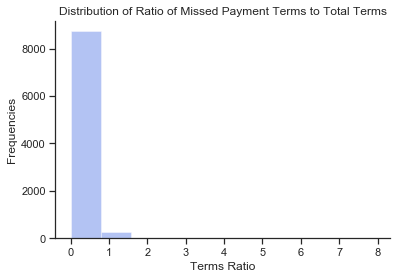

In [60]:
# distribution of terms ratio
# not including 0 since we are not interested in the 0's themselves.
plt.hist(loans_final["terms_ratio"][loans_final.terms_ratio != 0], color = "royalblue", alpha = 0.4)
plt.title("Distribution of Ratio of Missed Payment Terms to Total Terms")
plt.xlabel("Terms Ratio")
plt.ylabel("Frequencies")
sns.despine()
plt.show()

The terms ratio seems to follow an exponential distribution. Thus, it's better to plot the terms ratio as a box plot to get an idea of what the distribution actually looks like.

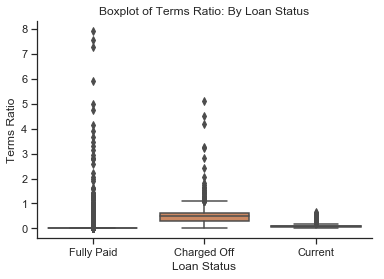

In [61]:
# boxplot of terms ratio over loan status
sns.boxplot(x = "loan_status", y = "terms_ratio", data = loans_final)
plt.title("Boxplot of Terms Ratio: By Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Terms Ratio")
sns.despine()
plt.show()

The boxplot shown above gives us enough information about how terms_ratio varies by loan status. That is, if a person's terms ratio is above a certain value, then there's a good chance that the person is going to default.

## Terms_Ratio and DTI

<Figure size 432x288 with 0 Axes>

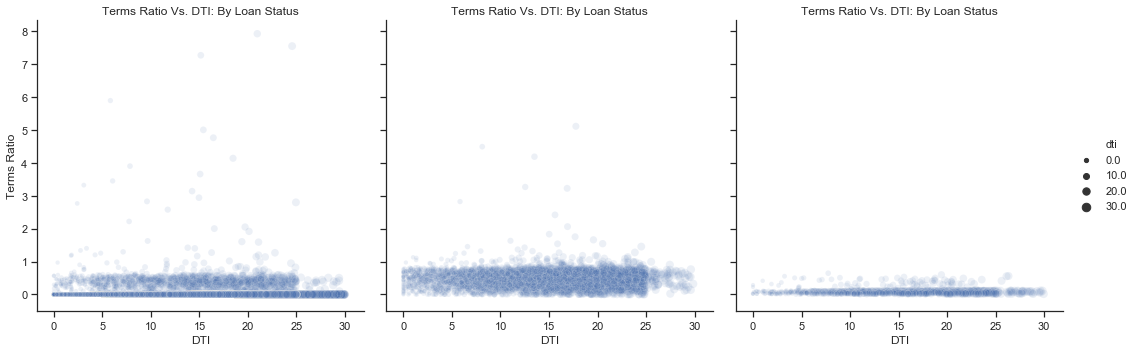

In [62]:
plt.figure(num = None)
g = sns.relplot(x = "dti", y = "terms_ratio", col = "loan_status", size = "dti", 
            data = loans_final, kind = "scatter", alpha = 0.1)
g.set_titles("Terms Ratio Vs. DTI: By Loan Status")
g.set_xlabels("DTI")
g.set_ylabels("Terms Ratio")
plt.show()

Those masses of points don't reveal a lot of information. But, we can see clearly, patterns in the data. In general for people who had high number of missed term payments were likely to have a high debt to income ratio too.But, the correlation doesn't seem to be too strong. The number might provide justification to this statement.

In [63]:
loans_final["dti"].corr(loans_final["terms_ratio"])

0.035818126001606006

A correlation of only 0.035. That's not a lot. But, it does showcase a weak positive relationship. But, this might not amount to anything. So, any strong conclusions cannot be drawn about the relationship between the number of missed term payments and dti.

# Conclusions

Of the 7 variables analyzed, almost everyone of them was found to explain loan defaults in some way. 

Higher interest rates were found to be a likely cause of loan defaults. People who had no houses of their own, or had mortgage on their property were again found to be likely defaulters.

People who skipped a certain number of payments were found to be likley defaulters. 

While a high debt-to-income ratio did indicate a decreased ability to repay the loan, there is no stern evidence to support the claim that a higher debt-to-income ratio meant that a person was more likely to default.

Finally, the purupose of the loan indicated that high value loans that lasted for 36 months had had more defaulters in the past. This might be because of the inherent nature of the transaction. If a person is borrowing money to pay off debt, then there's a good chance that they have no money to repay the loan. Thus, a debt-consolidation borrowal might need to be reviewed with a more discerning eye.